# Main Focus of the Notebook: Running Laptrack on detections

### This notebook takes as input the dataframe which contains filtered detected spots and runs laptrack module on it. 
### A new dataframe containing tree id and track id is returned. For us main variable for tracks is track id. 

In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from laptrack import LapTrack, ParallelBackend
import napari
from skimage import io
import time  

Import the dataframe of filtered spots 

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Data/full_movie_output_zarr/cleaned_spots_intensities_c3_all.pkl'
cleaned_spots_df = pd.read_pickle(path)

In [3]:
max_distance = 3
lt = LapTrack(
    track_dist_metric="sqeuclidean",  # The similarity metric for particles. See `scipy.spatial.distance.cdist` for allowed values.
    splitting_dist_metric="sqeuclidean",
    merging_dist_metric="sqeuclidean",
    # the square of the cutoff distance for the "sqeuclidean" metric
    track_cost_cutoff=max_distance**2,
    gap_closing_cost_cutoff = (2*max_distance)**2,
    gap_closing_max_frame_count = 1,
    splitting_cost_cutoff=False,  # or False for non-splitting case
    merging_cost_cutoff=False,  # or False for non-merging case
)

In [4]:

start_time = time.time()

track_df, split_df, merge_df = lt.predict_dataframe(
    cleaned_spots_df,
    coordinate_cols=[
        "mu_x",
        "mu_y",
        "mu_z"
    ],  # the column names for the coordinates
    frame_col="frame",  # the column name for the frame (default "frame")
    only_coordinate_cols=False,  # if False, returned track_df includes columns not in coordinate_cols.
    # False will be the default in the major release.
)

end_time = time.time()

execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")
track_df = track_df.reset_index()

Total execution time: 48.020304918289185 seconds


In [5]:
c3_tracking_pickle_file = "/Users/apple/Desktop/Akamatsu_Lab/Data/full_movie_output_zarr/track_df_c3_cleaned.pkl"

# Save the DataFrame to a pickle file
track_df.to_pickle(c3_tracking_pickle_file)

In [6]:
track_df['track_id'].nunique()

4781

In [7]:
track_appearances = track_df['track_id'].value_counts().reset_index()
track_appearances.columns = ['track_id', 'length']
track_appearances.head()

,track_id,length
0,0,2
1,1680,2
2,1675,2
3,1674,2
4,1673,2


In [8]:
track_appearances['length'].describe()

count    4781.000000
mean        1.304330
std         0.460171
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: length, dtype: float64

In [9]:
track_appearances['length'].value_counts()

length
1    3326
2    1455
Name: count, dtype: int64

array([[<Axes: title={'center': 'length'}>]], dtype=object)

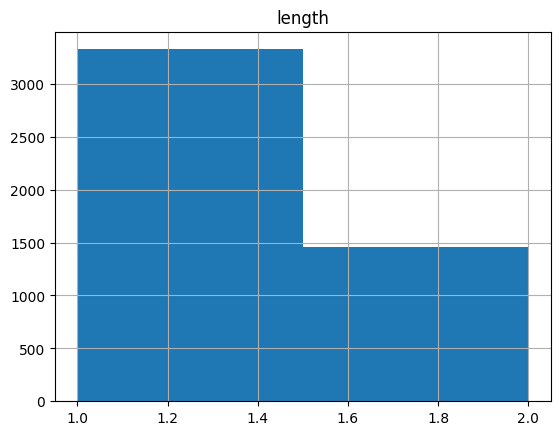

In [11]:
track_appearances.hist(column='length', bins = 2)